In [3]:
from datasets import load_dataset
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import nltk
from nltk import pos_tag, word_tokenize
import math

In [7]:
# thanks to github.com/IlyaSemenov 's efforts, we have a ready made wikipedia word frequency list
# https://github.com/IlyaSemenov/wikipedia-word-frequency/blob/master/results/enwiki-2023-04-13.txt
words_file = 'data/enwiki-2023-04-13.txt'

data = []
with open(words_file, 'r') as f:
    data = [line.strip().split() for line in f]

In [8]:
df = pd.DataFrame(data, columns=['word','count'])
df['count'] = pd.to_numeric(df['count'])
df = df.sort_values(by="count", ascending=False)
df

,word,count
0,the,186631452
1,of,88349543
2,in,76718795
3,and,76039670
4,a,54631147
...,...,...
2765321,tornedalean,3
2765320,sheida-ye-esfahani,3
2765375,kimely,3
2765374,姚晃,3


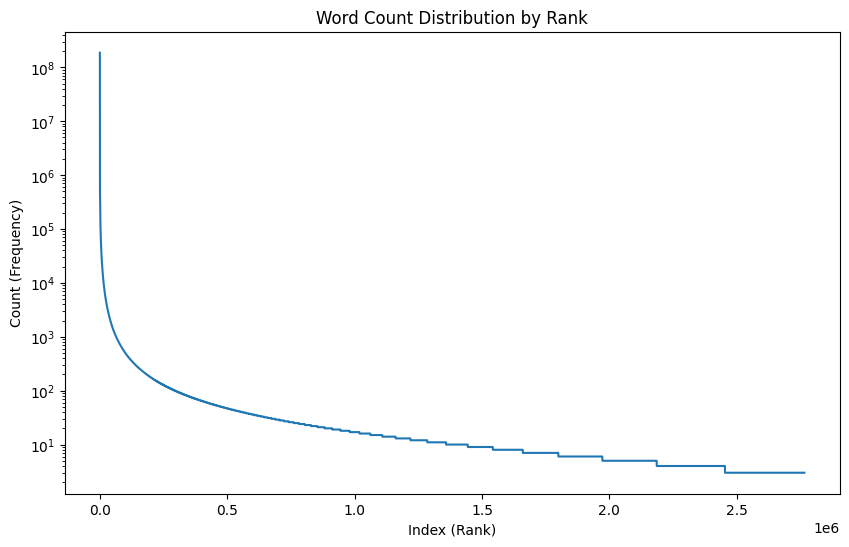

In [9]:
counts = df['count']
plt.figure(figsize=(10, 6))
sns.lineplot(x = np.arange(len(counts)), y = counts, marker=None)

plt.yscale('log')

plt.title('Word Count Distribution by Rank')
plt.xlabel('Index (Rank)')
plt.ylabel('Count (Frequency)')
plt.show()

In [10]:
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /home/lucid/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [11]:
def get_pos(word):
    if word is None:
        return 'NONE'
    return pos_tag([word])[0][1]

df['pos'] = df['word'].apply(get_pos)
df

,word,count,pos
0,the,186631452,DT
1,of,88349543,IN
2,in,76718795,IN
3,and,76039670,CC
4,a,54631147,DT
...,...,...,...
2765321,tornedalean,3,NN
2765320,sheida-ye-esfahani,3,NN
2765375,kimely,3,RB
2765374,姚晃,3,NN


In [12]:
word_counts = df.groupby('pos')['word'].nunique().reset_index(name='word_count')
word_counts_sorted = word_counts.sort_values(by='word_count', ascending=False)

print(word_counts_sorted)

     pos  word_count
9     NN     2336836
10   NNS      210664
5     JJ      159138
18   VBG       20676
13    RB       18240
19   VBN       15267
16    VB        2661
17   VBD         706
7    JJS         577
4     IN         313
2     DT         135
1     CD          39
21   VBZ          30
22   WDT          27
11   PRP          15
6    JJR          13
8     MD          12
12  PRP$           7
0     CC           5
25   WRB           4
14   RBR           4
23    WP           3
20   VBP           2
3     FW           1
15    TO           1
24   WP$           1


In [13]:
pos_group_map = {
    'NN': 'Noun', 'NNS': 'Noun', 'NNP': 'Noun', 'NNPS': 'Noun',
    'VB': 'Verb', 'VBD': 'Verb', 'VBG': 'Verb', 'VBN': 'Verb', 'VBP': 'Verb', 'VBZ': 'Verb',
    'JJ': 'Adjective', 'JJR': 'Adjective', 'JJS': 'Adjective',
    'RB': 'Adverb', 'RBR': 'Adverb', 'RBS': 'Adverb',
    'PRP': 'Pronoun', 'PRP$': 'Pronoun', 'WP': 'Pronoun', 'WP$': 'Pronoun',
    'DT': 'Determiner',
    'IN': 'Preposition',
    'CC': 'Conjunction',
    'MD': 'Modal',
    'TO': 'To',
    'WDT': 'Wh-Word', 'WRB': 'Wh-Word',
    'CD': 'Number',
    'FW': 'Foreign',
    'NONE': 'Other'
}

# Map POS tags to broader categories
df['category'] = df['pos'].map(pos_group_map).fillna('Other')

In [14]:
# Group by category, count unique words, and sort by word_count
word_counts = df.groupby('category')['word'].nunique().reset_index(name='word_count')
word_counts_sorted = word_counts.sort_values(by='word_count', ascending=False)

print(word_counts_sorted)

       category  word_count
6          Noun     2547500
0     Adjective      159728
11         Verb       39342
1        Adverb       18244
8   Preposition         313
3    Determiner         135
7        Number          39
12      Wh-Word          31
9       Pronoun          26
5         Modal          12
2   Conjunction           5
4       Foreign           1
10           To           1


In [31]:
nouns = df[df['category'] == 'Noun'].sort_values(by='count', ascending=False)
verbs = df[df['category'] == 'Verb'].sort_values(by='count', ascending=False)
# adjectives = df[df['category'] == 'Adjective']
# adverbs = df[df['category'] == 'Adverb']

In [32]:
# Our max vocabulary is 2000, generation shall also add more.
# resembling that of kids, with estimated distribution as:
# Nouns: 50% -> 1000
# Verbs: 40%. -> 800
# Adjectives: 5%. -> 100
# Adverb: 5%. -> 100
# Other: 5% (We are not including this, so the remaining 10% will be redistributed)

nouns = nouns.head(1000)
verbs = verbs.head(800)


In [34]:
def write(df, column_name, file_path):
    with open(file_path, 'w', encoding='utf-8') as f:
        for value in df[column_name]:
            f.write(f"{value}\n")

In [35]:
write(nouns, 'word', 'words/nouns.txt')
write(verbs, 'word', 'words/verbs.txt')